<a href="https://colab.research.google.com/github/Vickmugo/Data-Science/blob/main/Statistics_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# connecting to google drive
# importying the google colab library
from google.colab import drive
drive.mount('/content/drive')
print('Mounting Successful')

Mounted at /content/drive
Mounting Successful


In [ ]:
# read data
import numpy as np
import pandas as pd
from scipy import stats

# reading data
loan = pd.read_csv('/content/drive/MyDrive/datasets/loan_dataset.csv')
loan.head()


,Collateral,Loan Amount,LOAN USAGE,Gender,Age,Disburs_Method,Default,quarter_year
0,Checkoff,10000.0,BUSINESS,Male,29,Manual,Yes,Q2
1,Checkoff,10000.0,MEDICAL,Male,31,Manual,Yes,Q3
2,Checkoff,10283.0,EDUCATION,Male,49,Mobile Banking,Yes,Q4
3,Checkoff,10391.0,EDUCATION,Male,27,Mobile Banking,Yes,Q4
4,Checkoff,10427.0,OTHERS,Male,36,Mobile Banking,Yes,Q2


In [ ]:
# get the info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2959 entries, 0 to 2958
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Collateral      2959 non-null   object 
 1   Loan Amount     2959 non-null   float64
 2   LOAN USAGE      2959 non-null   object 
 3   Gender          2959 non-null   object 
 4   Age             2959 non-null   int64  
 5   Disburs_Method  2959 non-null   object 
 6   Default         2959 non-null   object 
 7   quarter_year    2959 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 185.1+ KB


In [ ]:
# using describe to obtain statistical summaries for numeric variables

np.set_printoptions(suppress=True, precision = 6)
print(loan.describe())

        Loan Amount          Age
count  2.959000e+03  2959.000000
mean   2.620618e+05    44.186550
std    3.207445e+05    10.442233
min    1.000000e+04     0.000000
25%    8.000000e+04    36.000000
50%    1.600000e+05    43.000000
75%    3.033115e+05    52.000000
max    3.000000e+06    87.000000


In [ ]:
print(loan.describe(include = "object"))

       Collateral LOAN USAGE Gender Disburs_Method Default quarter_year
count        2959       2959   2959           2959    2959         2959
unique          2          9      2              2       2            4
top       Logbook   BUSINESS   Male         Manual     Yes           Q2
freq         2420       2242   2365           2122    2011          878


In [ ]:
# mean, median, mode

age = loan['Age']
print(f'Mean(Age):{np.mean(age)}')
print(f'Median(Age):{np.median(age)}')
print(f'Mode(Age):{stats.mode(age).mode}')

Mean(Age):44.18654950996959
Median(Age):43.0
Mode(Age):39


In [ ]:
# variance, std dev, iqr, measures of spread
# Chaos theory - a slight change in parameters cause a huge change in outcome

print(f"Max(Age):{np.max(age)}")
print(f"Min(Age):{np.min(age)}")
print(f"Range(Age):{np.max(age) - np.min(age)}")
print(f"Variance(Age):{np.var(age)}")
print(f"Standard Deviation(Age):{np.std(age)}")
print(f"Interquartile Range: {np.percentile(age, 80) - np.percentile(age, 20)}")

Max(Age):87
Min(Age):0
Range(Age):87
Variance(Age):109.00338785755218
Standard Deviation(Age):10.440468756600547
Interquartile Range: 18.0


In [ ]:
# check how many have thr age 0 and less than 18
# do we drop the rows
# do we impute

loan["Age"].describe()

,Age
count,2959.000000
mean,44.186550
std,10.442233
min,0.000000
25%,36.000000
50%,43.000000
75%,52.000000
max,87.000000


In [ ]:
# age less than 18
under_18 = loan[loan["Age"] < 18]
under_18.head(15)

,Collateral,Loan Amount,LOAN USAGE,Gender,Age,Disburs_Method,Default,quarter_year
771,Checkoff,83000.00,BUSINESS,Female,2,Manual,Yes,Q3
897,Checkoff,98997.49,BUSINESS,Male,3,Manual,Yes,Q3
1583,Logbook,180000.00,OTHERS,Female,5,Manual,Yes,Q1
1714,Logbook,200000.00,BUSINESS,Female,0,Manual,Yes,Q2
2074,Logbook,280000.00,BUSINESS,Male,0,Manual,Yes,Q2


In [ ]:
loan.shape


(2959, 8)

In [ ]:
# dropping rows whose age is less than 18

loan = loan[loan["Age"] >= 18]
age = loan["Age"]
age = loan["Age"]
print(f"Max Age: {max(age)}")
print(f"Min Age: {min(age)}")
print(f"Range: {np.max(age) - np.min(age)}")
print(f"Variance: {np.var(age)}")
print(f"Standard Deviation: {np.std(age)}")
print(f"Interquartile Range: {np.percentile(age, 75) - np.percentile(age, 25)}")

Max Age: 87
Min Age: 21
Range: 66
Variance: 106.1643324475631
Standard Deviation: 10.30360773940677
Interquartile Range: 16.0


In [ ]:
# Summarizing categorical variables - gender

gender = loan["Gender"]
print(gender.value_counts())

Gender
Male      2363
Female     591
Name: count, dtype: int64


In [ ]:
# Summarizing caterogorical variables - loan usage
loan_usage = loan["LOAN USAGE"]
loan_usage_counts = loan_usage.value_counts()
loan_usage_percentages = loan_usage.value_counts(normalize=True) * 100

print("LOAN USAGE Counts and Percentages:")
for usage, count in loan_usage_counts.items():
    percentage = loan_usage_percentages[usage]
    print(f"{usage}: {count} ({percentage:.2f}%)")

LOAN USAGE Counts and Percentages:
BUSINESS: 2238 (75.76%)
OTHERS: 246 (8.33%)
EDUCATION: 203 (6.87%)
AGRICULTURE: 112 (3.79%)
MEDICAL: 73 (2.47%)
ASSET PURCHASE: 45 (1.52%)
HOUSE DEVELOPMENT: 33 (1.12%)
DAIRY FARMING: 3 (0.10%)
INSURANCE: 1 (0.03%)


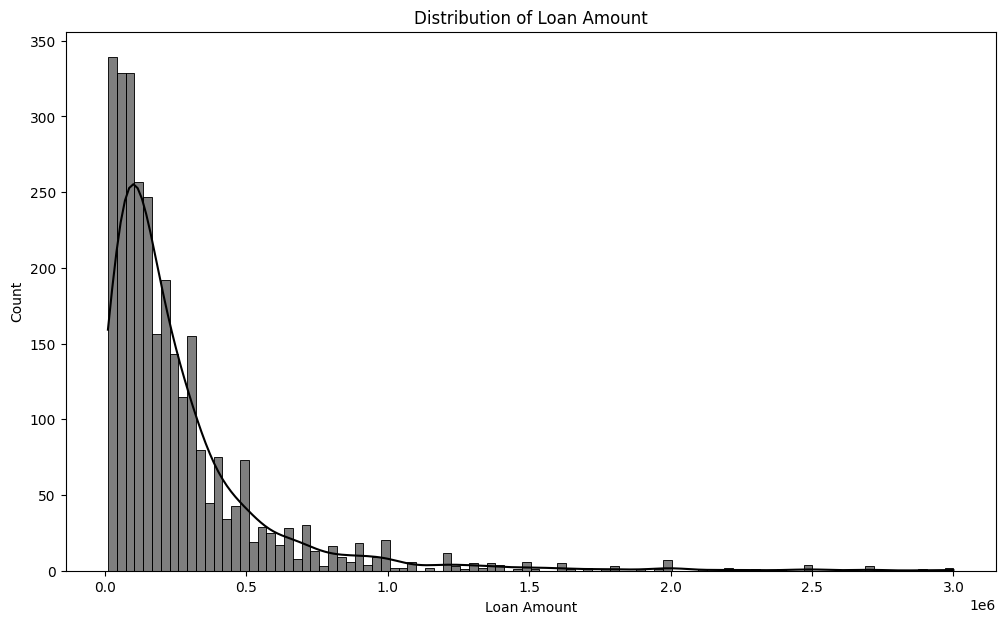

In [ ]:
# visual summaries(histograms, box plots with seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 7))
loan_amount = loan["Loan Amount"]
sns.histplot(data = loan_amount, kde = True, color = "black")#kde= kernel density estimation(provides a smooth, continuous curve that visualizes the distribution of observations in a dataset)
plt.title("Distribution of Loan Amount")
plt.show()

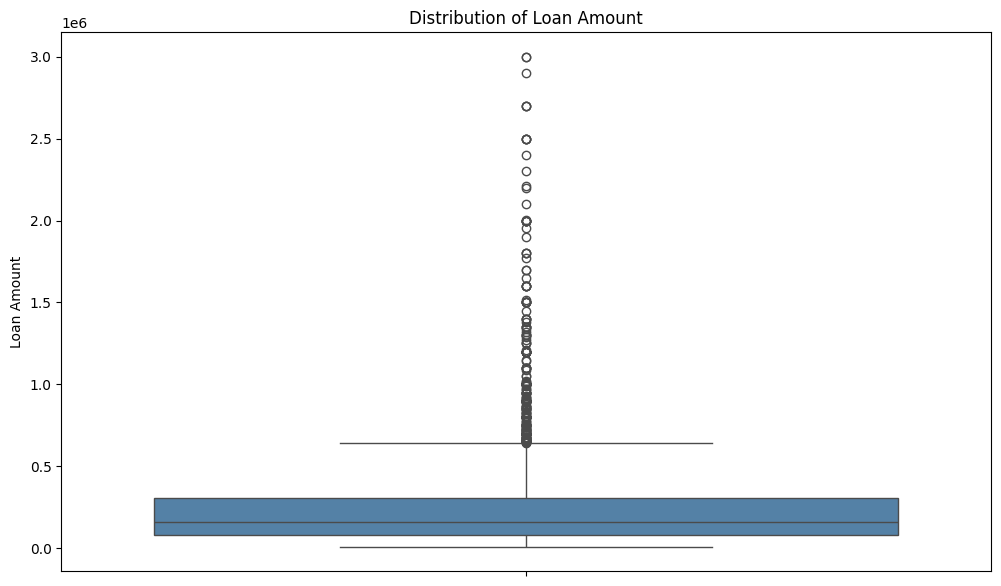

In [ ]:
# boxplot of loan amount
loan_amount = loan["Loan Amount"]
plt.figure(figsize = (12, 7))
sns.boxplot(data = loan_amount, color = "steelblue")
plt.title("Distribution of Loan Amount")
plt.show()

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2954 entries, 0 to 2958
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Collateral      2954 non-null   object 
 1   Loan Amount     2954 non-null   float64
 2   LOAN USAGE      2954 non-null   object 
 3   Gender          2954 non-null   object 
 4   Age             2954 non-null   int64  
 5   Disburs_Method  2954 non-null   object 
 6   Default         2954 non-null   object 
 7   quarter_year    2954 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 207.7+ KB


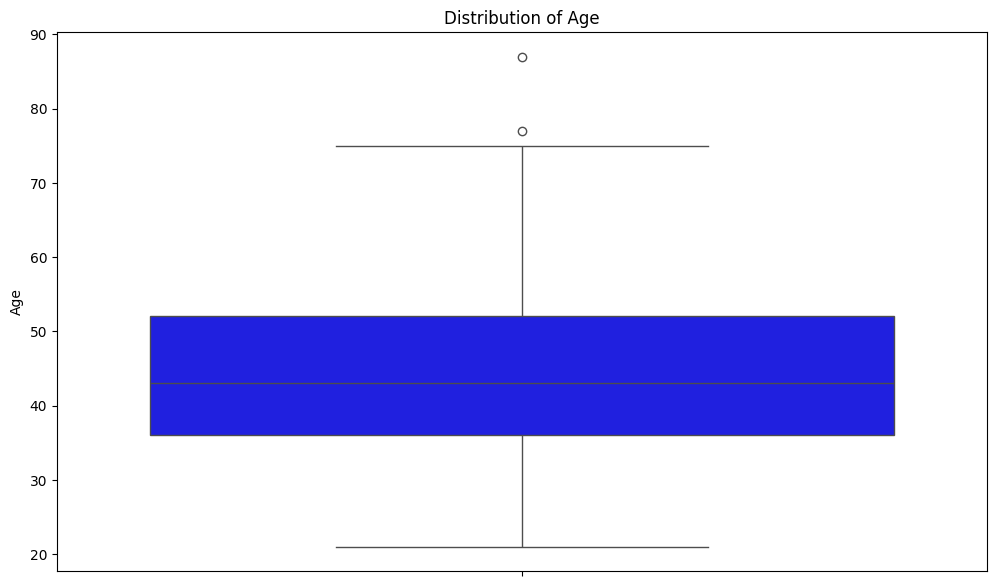

In [ ]:
# box plot of Age
plt.figure(figsize = (12, 7))
sns.boxplot(data = loan['Age'], color ='b')
plt.title("Distribution of Age")
plt.show()

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2954 entries, 0 to 2958
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Collateral      2954 non-null   object 
 1   Loan Amount     2954 non-null   float64
 2   LOAN USAGE      2954 non-null   object 
 3   Gender          2954 non-null   object 
 4   Age             2954 non-null   int64  
 5   Disburs_Method  2954 non-null   object 
 6   Default         2954 non-null   object 
 7   quarter_year    2954 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 207.7+ KB


In [ ]:
# Assignment

# Find the pearson, spearman correlation
# Plot the correlation between age and loan amount (use a seaborn heatmap)
# Use a scatter to visualize correlation between age and loan amount
import pandas as pd

# Pearson correlation
pearson_corr = loan[['Loan Amount', 'Age']].corr(method='pearson')
print("Pearson Correlation:\n", pearson_corr)

# Spearman correlation
spearman_corr = loan[['Loan Amount', 'Age']].corr(method='spearman')
print("\nSpearman Correlation:\n", spearman_corr)


Pearson Correlation:
              Loan Amount       Age
Loan Amount     1.000000  0.030953
Age             0.030953  1.000000

Spearman Correlation:
              Loan Amount      Age
Loan Amount      1.00000  0.03024
Age              0.03024  1.00000


/tmp/ipython-input-27-2545709682.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'Age', y = 'Loan Amount', data = loan, palette = 'viridis')


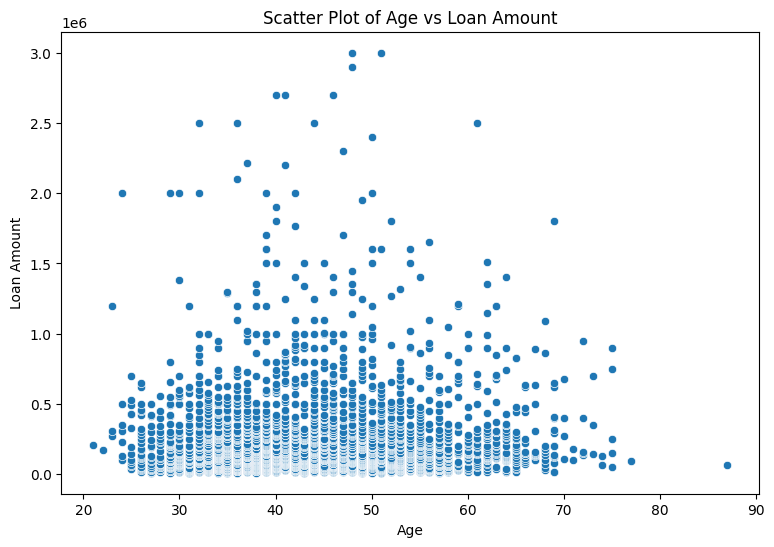

In [ ]:
# visualizing data using a scatter plot
plt.figure(figsize =(9,6))
sns.scatterplot(x = 'Age', y = 'Loan Amount', data = loan, palette = 'viridis')
# aesthetics
plt.title('Scatter Plot of Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()

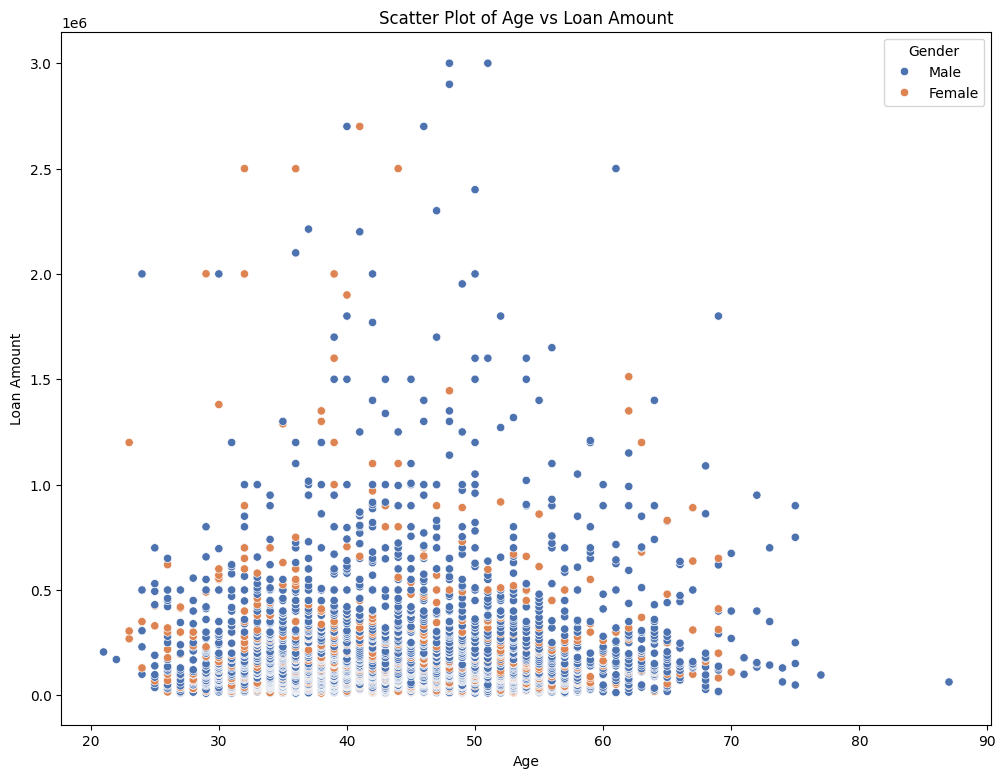

In [ ]:
# visualizing data using scatter plot, layering with another variable
plt.figure(figsize = (12, 9))
sns.scatterplot(x = 'Age', y ='Loan Amount', hue = 'Gender', data = loan, palette = 'deep')
# aesthetics
plt.title('Scatter Plot of Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()

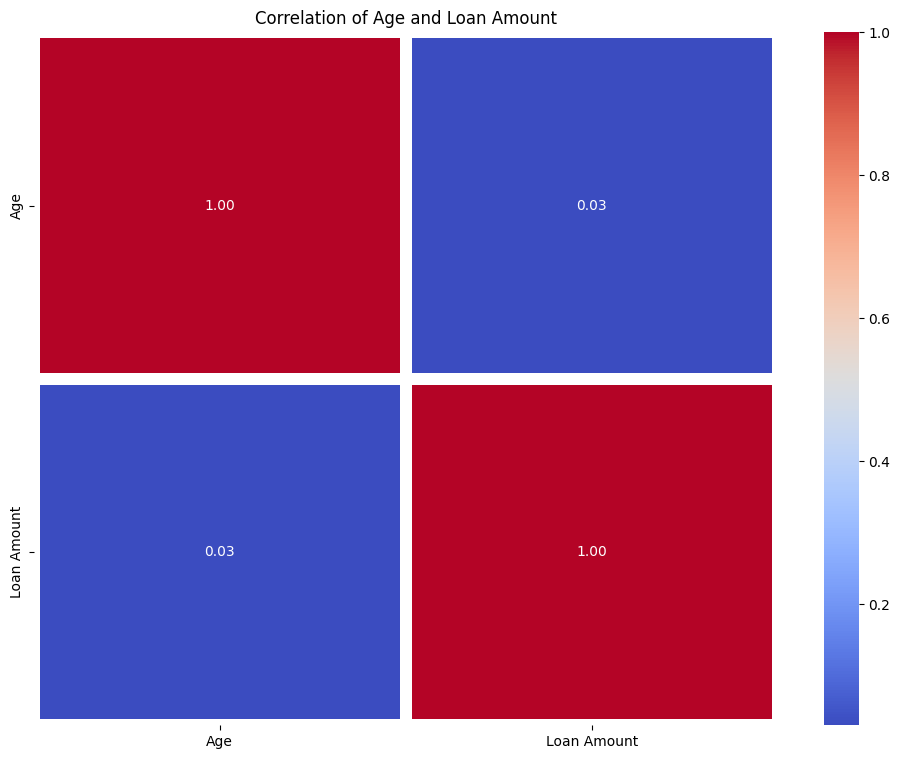

In [ ]:
# plotting correlation using a heatmap

plt.figure(figsize =(12, 9))
numeric_cols = ['Age', 'Loan Amount']
loan_numeric = loan[numeric_cols]
sns.heatmap(loan_numeric.corr(), annot = True, cmap = 'coolwarm', linewidth = 8.5, fmt ='.2f')
# aesthetics
plt.title('Correlation of Age and Loan Amount')
plt.show()
# shows age and loan amount are not related linearly

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2954 entries, 0 to 2958
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Collateral      2954 non-null   object 
 1   Loan Amount     2954 non-null   float64
 2   LOAN USAGE      2954 non-null   object 
 3   Gender          2954 non-null   object 
 4   Age             2954 non-null   int64  
 5   Disburs_Method  2954 non-null   object 
 6   Default         2954 non-null   object 
 7   quarter_year    2954 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 207.7+ KB


/tmp/ipython-input-40-3511111492.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = gender, y = collateral, palette = 'deep')


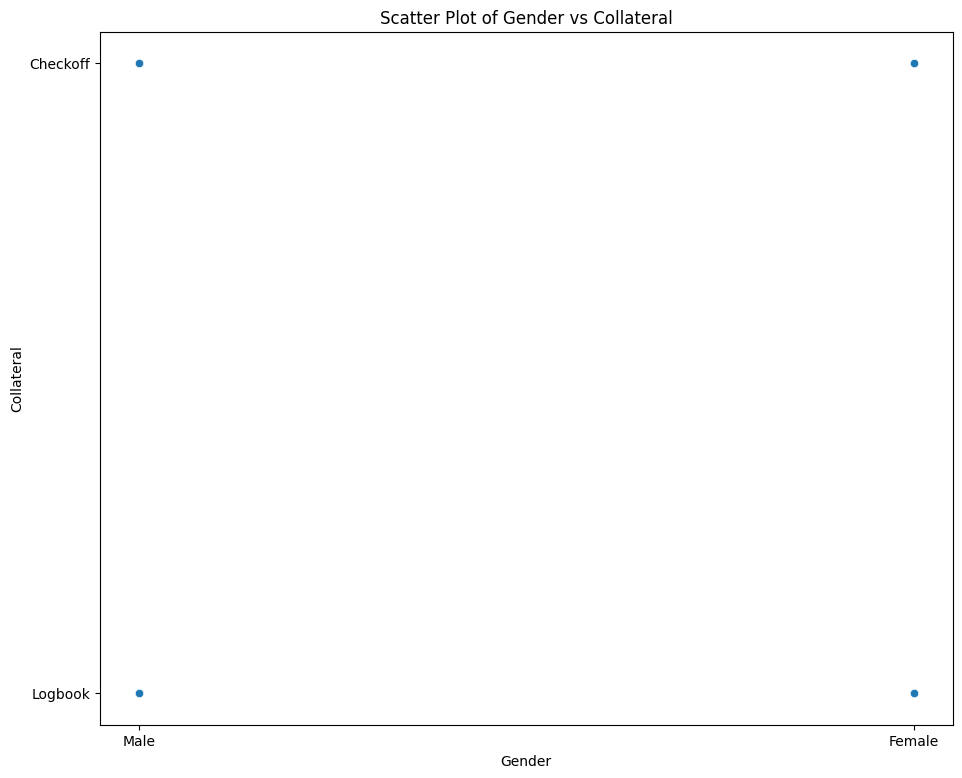

In [ ]:
# scatter plot of relationship between variables(only works for continuous variables so reason for code not working)
gender = loan['Gender']
collateral = loan['Collateral']
plt.figure(figsize = (11,9))
sns.scatterplot(x = gender, y = collateral, palette = 'deep')
# aesthetics
plt.title('Scatter Plot of Gender vs Collateral')
plt.xlabel('Gender')
plt.ylabel('Collateral')
plt.show()


In [ ]:
# find out whether women default more or is it men?